Supporting textbook chapters for week 5: Chapter 7

**Lecture 5, topics:**
* Discrete Fourier Transforms (DFTs)
* Fast Fourier Transforms (FFTs)

# Fourier: reminders

If you need a serious refresher on what Fourier series are, the YouTube Channel 3Blue1Brown by Grant Sanderson has this video: https://youtu.be/r6sGWTCMz2k 

In computational physics, we often compute Fourier series as a way to compute Fourier transforms.
For a refresher or introduction about Fourier transforms, the same channel also has a video about it: https://youtu.be/spUNpyF58BY

## Fourier Series

In 1822, Joseph Fourier wanted to compute temperature distributions in objects, based on the heat flux equation $\vec \phi = \kappa \vec\nabla T$, where $\vec \phi$ is the flux vector, $\kappa$ the heat diffusivity and $T$ is the temperature.
He did so by finding a way to express periodic functions as linear combinations of sines and cosines.

We can write any periodic function $f$ with period $L$ on the interval $[0, L]$ as a "Fourier series".

$$f(x) = \sum_{k=0}^{\infty}\left[\alpha_k \cos\left(\frac{2\pi k x}{L}\right) + \beta_k\sin\left(\frac{2\pi k x}{L}\right)\right]$$
$$= \sum_{k=-\infty}^{\infty}\gamma_k \exp\left(i\frac{2\pi k x}{L}\right),\qquad\qquad\quad $$
with 
\begin{align*}
\gamma_k & = \frac{\alpha_{-k} + i\beta_{-k}}2 & \text{if}\quad k<0,\\
\gamma_k & = \alpha_0 & \text{if}\quad k=0,\\
\gamma_k & = \frac{\alpha_{k} - i\beta_{k}}2 & \text{if}\quad k>0,
\end{align*}
and
$$\forall k, \quad \gamma_k = \frac1L\int_0^L f(x)\exp\left(-i\frac{2\pi k x}{L}\right)dx\quad \text{from orthogonality of sin/cos functions}.$$

Orthogonality of the sine functions:
\begin{align*}
& \int_0^L\sin\left(\frac{\pi n x}{L}\right)\sin\left(\frac{\pi m x}{L}\right)dx = \frac{L}2 \delta_{nm}, \\
& \int_0^L\cos\left(\frac{\pi n x}{L}\right)\cos\left(\frac{\pi m x}{L}\right)dx = \frac{L}2 \delta_{nm},\\
& \int_0^L\sin\left(\frac{\pi n x}{L}\right)\cos\left(\frac{\pi m x}{L}\right)dx = 0
\end{align*}

For non-periodic functions, we can repeat the function over the portion of interest and discard the rest
![Newman's fig. 7.1](fig7-1.png)
Solid grey line = actual function,   Solid black line = function bracketed to the interval $[0, L]$

Dashed lines = bracketed function replicated over other intervals to make it periodic.

## Fourier transforms

What if $L \to \infty$? Then, separation between wave numbers or frequencies tend to zero:
    $$\frac{2\pi (k+1) x}{L} - \frac{2\pi k x}{L} = \frac{2\pi x}{L} \to 0.$$
And the discrete sums turn into integrals:
    $$f(x) = \sum_{k=-\infty}^\infty \gamma_k\text e^{2\pi i \nu_k x} \to \int_{-\infty}^\infty \hat f(\nu)\text e^{-2\pi i \nu x} \text d \nu,$$
    with $\nu_k = k/L$ (discrete) or $\nu$ (continuous) the frequency of each Fourier component, $\hat f$ the **Fourier transform** of $f$.
    
Just like we could retrieve the $\gamma_k$'s from $f$ with the integral formulas above, we can invert the Fourier transform:
        $$\hat f(\nu) = \int_{-\infty}^\infty f(x)\text e^{2\pi i \nu x} \text d x.$$

**Example: light switch**

Turn a light switch at $t=t_0-\tau/2$, and turn it off at $t=t_0+\tau/2$.
The light emitted during this interval has frequency $\nu_0$, and the field emitted is:
$$E = E_0\text e^{-2 i\pi \nu_0 t}\quad \text{if}\quad t_0 - \frac\tau2\leq t\leq t_0 + \frac\tau2,\qquad E = 0\quad\text{otherwise}.$$

Apply previous formula,
$$\hat E = \int_{t_0-\tau/2}^{t_0+\tau/2} E(t)\text e^{2\pi i (\nu-\nu_0) t} \text d \nu = E_0\tau \text e^{2\pi i (\nu-\nu_0) t_0}\underbrace{\frac{\sin\left[\pi(\nu-\nu_0)\tau\right]}{\pi(\nu-\nu_0)\tau}}_{=\text{sinc}\left[(\nu-\nu_0)\tau\right]},$$
where $\text{sinc}$ is called the Cardinal sine function.

In [70]:
import numpy as np
import matplotlib.pyplot as plt
tau = 1.  # Switch duration
t0 = 10.  # time of switch
nu0 = 5.  # frequency of wave
time = np.linspace(-tau*5, tau*5, 1024*4)  # time array

E = 0j*time
E[abs(time) < tau/2] = np.exp(2j*np.pi*time[abs(time) < tau/2]*nu0)

nu = np.linspace(0, 2*nu0, 1024*4)  # frequency array
Ehat = np.exp(2j*np.pi*(nu-nu0)*t0)*np.sinc((nu-nu0)*tau) 

In [71]:
def plot_FT():
    plt.figure(figsize=(5, 4), dpi=150)
    plt.subplot(211)  # real signal
    plt.plot(t0+time, np.real(E))
    plt.grid()
    plt.xlabel('time $t$ (s)')
    plt.ylabel('$E(t)/E_0$')
    plt.subplot(212)  # Fourier transform signal
    plt.plot(nu, np.real(Ehat), label='Real part')
    plt.plot(nu, np.abs(Ehat), '--', label='Magnitude ("spectrum")')
    plt.grid()
    plt.xlabel(r'Frequency $\nu$ (Hz)')
    plt.ylabel(r'$\hat E(t)/(\tau E_0)$')
    plt.legend()
    plt.tight_layout()

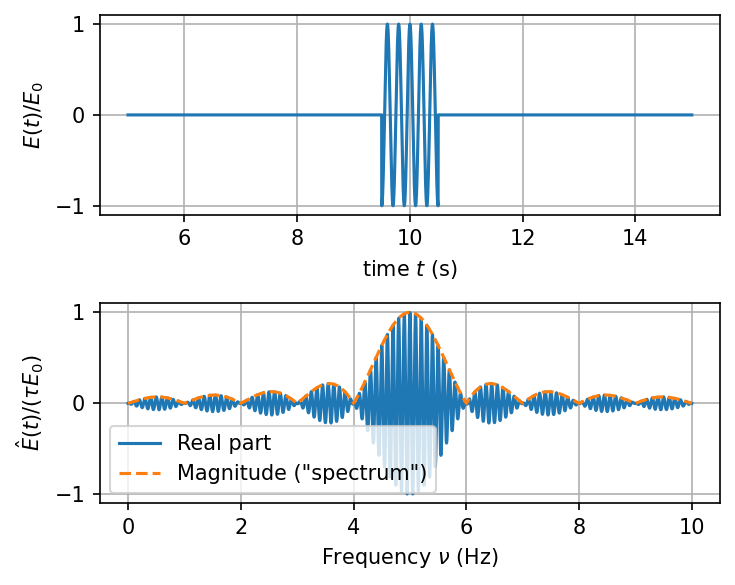

In [72]:
plot_FT()

* Fourier spectrum: centred around $\nu=\nu_0$, but not strictly $\nu_0$.
* Increase duration or increase frequency (actual light switch): spectrum is narrower around $\nu=\nu_0$: better plane wave approximation.
* Shorten duration or decrease frequency (pulsed laser): harder to define one frequency.
* Bandwidth theorem:
    $$\tau\Delta\nu \approx 1$$
    *You may recognize something like Heisenberg's uncertainty principle!*

## Discrete Fourier Transform

Discretizing the Fourier transform operation: $\text d x \to \Delta_x$ finite, $x \to x_k = x_0 + k\Delta_x$ with $0\leq k < N$
$$\hat f(\nu) = \int_{-\infty}^\infty f(x)\text e^{2\pi i \nu x} \text d x \approx \sum_{k = 0}^{N-1}f(x_k)\text e^{2 i\pi\nu x_k} \Delta_x.$$

* Note how discretizing also requires bounding the interval.
* Only a Riemann sum but it illustrates the properties well enough. And it is actually how we compute FTs numerically.
* Also, the frequency is discretized: we usually use $\nu_n = n/N$.

The expression above then becomes a Fourier series: **When we compute Fourier transforms, we actually compute Fourier series**!
It is the user's job to know how to interpret a Fourier series as a Fourier transform.

Careful however: the formula above is not the exact expression for how to compute Fourier transforms numerically (patience). 

Mechanically, we turn any continuous function defined on the real axis as a periodic function on the interval $0\leq x < N\Delta_x$.
Choose your interval wisely if you really need the whole thing!
 * Periodic function: take integer number of periods. One is enough in theory but you never know (slight aperiodicity, noise...)
 * Function that decays to infinity: interval wide enough that the function has almost completely decayed at edges.
 * Function that keeps doing interesting stuff for ever (e.g.\ stochastic series): choose it wide enough that you encapsulate enough statistics, and know what you're not capturing.

Want to capture high frequencies? Make $\Delta_x$ smaller.

Want to capture low frequencies? Make the interval ($N\Delta_x$) longer.

* Now let's think about the integrals used for obtaining the Fourier coefficients $\gamma_k$'s.
* We divide $[0, L]$ up into $N$ segments and use the trapezoidal rule and periodicity of the function:

\begin{align*}
\gamma_k & = \frac1L \int_0^L f(x)\exp\left(-i\frac{2\pi k x}{L}\right) dx \\
         & \approx \frac1L \frac{L}N\left[\frac12 f(0) + \frac12 f(L) + \sum_{n=1}^{N-1} f(x_n) \exp\left(-i\frac{2\pi k x_n}{L}\right) \right] \\
         & = \frac1N \left[\sum_{n=0}^{N-1} f(x_n) \exp\left(-i\frac{2\pi k n}{N}\right) \right] \quad \text{because }f(0) = f(L)\text{ and }\frac{x_n}L = \frac{n}N.
\end{align*}

* Now define the Discrete Fourier Transform (DFT) as follows:
    $$y_k = f(x_k); \qquad c_k = N\gamma_k;$$

    DFT: $\boxed{\displaystyle c_k = \sum_{n=0}^{N-1}y_n \exp\left(-i\frac{2\pi kn}{N}\right)}$.
    
* Would it be better if we used a more precise integration function? No, because with the expression above we use the properties of the $\exp(-2i\pi kn/N)$ series to obtain two algorithms:
    * inverse DFT
    * Fast Fourier Transform

Note how, for $y(x)\in \mathbb{R}$,
    $$c_{N-k} = \sum_{n=0}^{N-1}y_n \exp\left(-i\frac{2\pi (N-k)n}{N}\right) =  \sum_{n=0}^{N-1}y_n \underbrace{\text e^{-i 2\pi n}}_{=1}\exp\left(+i\frac{2\pi kn}{N}\right) = c_k^*,$$
    or, in short, $c_{N-k} = c_k^*$.

* If $y(x)\in \mathbb{R}$, then we only need $N/2 + 1$ ($N$ even) or $(N+1)/2$ ($N$ odd) points to actually know the DFT.
* Python's `N//2+1` will give you this number.

In [58]:
N = 9  # increase it
N//2 + 1

5

## Inverse Discrete Fourier transform

The inverse DFT follows from the definition of the DFT and properties of exponential sums.

iDFT: $\boxed{\displaystyle y_n = \frac1N \sum_{k=0}^{N-1}c_k \exp\left(i\frac{2\pi kn}{N}\right)}$.

\begin{align*}
\sum_{k=0}^{N-1}c_k \exp\left(i\frac{2\pi kn}{N}\right) & = \sum_{k=0}^{N-1}\sum_{p=0}^{N-1} y_p \exp\left(-i\frac{2\pi kp}{N}\right)\exp\left(i\frac{2\pi kn}{N}\right) \\
    &= \sum_{k=0}^{N-1}\sum_{p=0}^{N-1} y_p \exp\left(i\frac{2\pi k(n-p)}{N}\right) \\
    &= \sum_{p=0}^{N-1} y_p \sum_{k=0}^{N-1}\exp\left(i\frac{2\pi k(n-p)}{N}\right)
\end{align*}

We can simplify using geometric series:
$$\forall a\in \mathbb C, \quad \sum_{k=0}^{N-1} a^k = \frac{1-a^N}{1-a}.$$
Using $a = \exp(+i2\pi m/N)$, 
$$\sum_{k=0}^{N-1} \exp\left(+i\frac{2\pi k m}N\right) = \frac{1-\exp(i2\pi m)}{1-\exp(i2\pi m/N)}.$$
$m\in\mathbb N \Rightarrow 1-\exp(i2\pi m) = 0$.
Two possibilities for denominator:
* If $m$ not multiple of $N$, denom. $\neq 0\ \Rightarrow \sum_{k=0}^{N-1}\dots = 0$.
* If $m$ is $0$ or multiple of $N$, then $1-\exp(i2\pi m/N) = 0$ also!
    
    0 divided by 0, we need to step back:
    $$\sum_{k=0}^{N-1} \exp(+i2\pi k p) = \sum_{k=0}^{N-1} 1 = N.$$

Therefore, the innermost sum of the previous double-sum is $N$ when $p=n$, and zero otherwise:
$$\sum_{p=0}^{N-1} y_p \sum_{k=0}^{N-1}\exp\left(i\frac{2\pi k(n-p)}{N}\right) = y_n \sum_{k=0}^{N-1}\exp\left(i\frac{2\pi k(n-n)}{N}\right) = Ny_n.$$
Divide the first and last expressions above, and you retrieve the iDFT expression framed above.

Exact result (up to machine precision of course)! It may be that a double-compensation of errors happened, but it works, thanks to the trapezoidal rule!

## Discrete sine and cosine Fourier transforms

Recall
$$f(x) = \sum_{k=0}^{\infty}\left[\alpha_k \cos\left(\frac{2\pi k x}{L}\right) + \beta_k\sin\left(\frac{2\pi k x}{L}\right)\right].$$

* If $f$ odd (i.e., $f(-x) = -f(x)$), then $\forall k$, $\alpha_k = 0$,
* If $f$ even (i.e., $f(-x) = +f(x)$), then $\forall k$, $\beta_k = 0$.

If you know that function has one of these properties, computing only 1/2 coefficients saves time and memory. 

## An implementation of the DFT

See the script `dft_ts.py`, adapted from Newman's online material.

Text(0.5, 1.0, 'pitch timeseries')

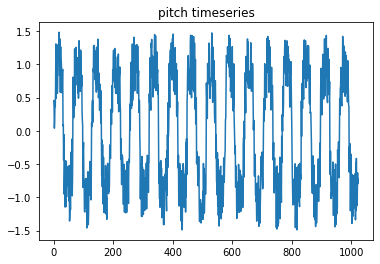

In [9]:
# Adapted from Newman's dft script, input pitch.txt
import numpy as np
import matplotlib.pyplot as plt

y = np.loadtxt("pitch.txt", float)
plt.plot(y)
plt.title('pitch timeseries')

In [10]:
def dft(y):
    N = len(y)
    c = np.zeros(N//2+1, complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
    return c

(0.0, 500.0)

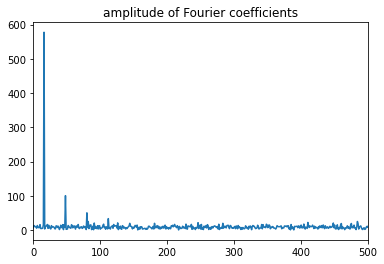

In [11]:
c = dft(y)
plt.plot(abs(c))
plt.title('amplitude of Fourier coefficients')
plt.xlim(0, 500)

# Fast Fourier Transforms

Can we speed up the DFT? Recall:

$$\qquad c_k = \sum_{n=0}^{N-1} y_n \exp\left(-i\frac{2\pi k n}{N}\right) $$

The `dft` snippet below requires $\approx N^2$ "unit" operations.

In [ ]:
for k in range(N//2+1):
    for n in range(N):
        c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)

* Your computer can afford a billion operations? Your limit is $N \sim 32,\!000$: too few to be practical.
* Fast Fourier Transform (FFT) overcomes this (Cooley & Tukey 1960’s, first found by Gauss 1805).
* There are more implementations (see Wikipedia), but we present the "historical" version.

## FFTs divide and conquer

Assume $N=2^M$ (other prime numbers in the decomposition are possible, but they will slow down the execution).
$$\text{Split}\qquad c_k = \sum_{n=0}^{N-1} y_n \exp\left(-i\frac{2\pi k n}{N}\right) = E_k + \omega^k O_k,$$
with 
\begin{align*}
E_k & = \sum_{p=0}^{N/2-1} y_{2p} \exp\left(-i\frac{2 p\pi k }{N/2}\right)\quad \text{the even indices } (n=2p),\\
O_k & = \sum_{p=0}^{N/2-1} y_{2p+1} \exp\left(-i \frac{2p\pi k}{N/2}\right)\quad \text{the odd indices, and}\\
\omega & = \text e^{-i2\pi /N}\quad\text{and}\quad\omega^k = \text e^{-i2\pi k/N}\quad \text{the "twiddle factor"}.
\end{align*}

$$\text{Split}\qquad c_k = \sum_{n=0}^{N-1} y_n \exp\left(-i\frac{2\pi k n}{N}\right) = E_k + \omega^k O_k,$$
* $E_k$ and $O_k$ represent DFTs over points sampled twice as far apart as the original interval.
* \# of operations for each $E_k$ and $D_k$: $\approx (N/2)^2$.
* If we stopped here: \# of operations would be $2\times (N/2)^2 + 2 \approx N^2/2+2$ (bisection + twiddle factor; OK, twiddle factor is a bit more, not enough to matter): **a lot less operations for large N!**
* keep going: $E_k$ and $O_k$ can be bisected (split into two) themselves.
* How many times can we do this until each $E_k$, $O_k$ has one term?
    * $N = 8 = 2^3$: we can do it $3 = \log_2(8)$ times.
    * $N=  16 = 2^4$: we can do it $4=\log_2(16)$ times.
    * ...
    * $N = 2^M$: we can do it $M = \log_2(N)$ times.
    

* If $N = 2^M$, after $M = \log_2(N)$ bisections, we get $N$ DFTs of a single sample:
    $$c_0 =  \sum_{n=0}^{1-1}y_n\text e^{-i 2\pi k n/N} = y_0,$$
    the value at the sample point!

So, you actually go back:
* take all sample points: that's the 1st set of samples.
* pair them according to the last FFT bisection in the process above,
* multiply the odd pairs by appropriate twiddle factors,
* use these results to work the next set of samples.

![Decimation in time of a length-N DFT into two length-N/2 DFTs followed by a combining stage (By Virens, CC BY 3.0  (https://creativecommons.org/licenses/by/3.0), from Wikimedia Commons).](DIT-FFT-butterfly.png)

## General formulas

Newman gives the derivation, but they're hard to follow without using actual numbers.

* $j$-th set of samples at the $m^\text{th}$ stage:
$$E_k^{(m,j)} = \sum_{p=0}^{N/2^m - 1}y_{2^m p + j}\exp\left(-i\frac{2\pi k p}{N/2^m}\right),\quad j \in \{0\dots 2^m-1\}$$
Note: all $E_k$ and $O_k$ of previous slides are now some $E_k^{(m, j)}$.
* $2^m = $ \# of DFTs at each level (indexed by $j$),
* $N/2^m = $ \# of samples per intermediate DFT (indexed by $k$),
* Recursively, working from $M = \log_2 N$:
    * First step: $E_k^{(M, j)} = y_j$ (no $k$ dependence), **ops:** $N$
    * Next steps: $E_k^{(m, j)} = E_k^{(m+1, j)} + \omega^{2^m k}E_k^{(m+1, j+2^m)}$, **ops:** $N/2^m \times 2^m = N$
    * Last step: $E_k^{(0, 0)} = c_k$, the desired DFT coefficients. **ops:** $N \times 1 = N$

* We end up with $N$ terms in each of the $\log_2(N)$ bisections, so the number of operations is $N\log_2(N)$.
* Huge speed increase for large $N$
* For $N=10^6$, old DFT algorithm is $O(N^2) = 10^{12}$ ops, but FFT is $O(N\log_2(N)) \sim 2 \times 10^7$ ops.
* Opens door to a wide range of calculations.
* Also more precise: less ops = less accumulation of machine precision errors.
* Note that the same reasoning applies to the inverse FT: the algorithm is called the inverse FFT (iFFT).
* You can write your own FFT (see Exercise 7.7), but there are good tricks for saving memory that are implemented in packages like `numpy.fft`:
    https://numpy.org/doc/stable/reference/routines.fft.html

See script `fft_ts.py`, which is derived from `dft_ts.py`.

The general formulas are useful if you want to code the FFT yourself, but you won't.

Your options for the rest of this lecture, from the simplest to the hardest:

* You are happy with what you've learned about the FFT and want to move on: skip to the sub-section "Example: de-noising a signal".
* You want to understand how FFT works a little deeper: watch the YouTube video at https://youtu.be/h7apO7q16V0 , where in 30 minutes, the narrator goes step-by-step with beautiful visuals. Grasping why FFT is so efficient is a great achievement :)
* You want to fully work out an example: go through next sub-section with $N=8$.
    * Will skip most of it in-class. Even with small $N$, it's tricky to follow how each step fits into the next. Actually implementing it in code is the easy part, usually a line or two.
    * Even if you perfectly understand the YouTube video, there is something to be said about doing it for yourself. One doesn't become a scientist only by watching videos, being able to do stuff is really what earns you a degree :)

## Example with $N=8$ 

We have $M=\log_2(8) = 3$, as well as $k=0, 1, \dots 7$ at every step. We also have
$$\omega = \exp\left(-\frac{2i\pi}8\right) \Rightarrow \omega^{n+8} = \omega^n,$$
which we will use a lot.

### Writing the pairings

The FFT algorithm actually starts from the real values and works its way up to the coefficients. Here, I will start from the coefficients and make my way down to the values, to better understand the notations.

#### First bisection

Second coefficient of the DFT is
\begin{align*}
    c_1 = E_1^{(0, 0)} & = \sum_{n=0}^3y_n e^{-2i\pi n/8} = \sum_{n=0}^3y_n \omega^{n} \\
    & = y_0 + \omega y_1 + \omega^2 y_2 + \omega^3 y_3 + \omega^4 y_4 + \omega^5 y_5 + \omega^6 y_6 + \omega^7 y_7 \\
    & = \underbrace{y_0 + \omega^2 y_2 + \omega^4 y_4 + \omega^6 y_6}_{E_1^{(1, 0)}} 
        + \omega\underbrace{\left(y_1 + \omega^2 y_3 + \omega^4 y_5 + \omega^6 y_7\right)}_{E_1^{(1, 1)}}   
\end{align*}

* Split and multiplication count as one operation for us.
* Very hard to actually figure out the exact number of ops quickly. Let's call this "unit operation", one that also happens in DFT for comparison: 
    **Bisection + multiplication = 1 operation**
* Verify for yourself that eqn.
$$E_k^{(m,j)} = \sum_{p=0}^{N/2^m - 1}y_{2^m p + j}\exp\left(-i\frac{2\pi k p}{N/2^m}\right), \quad j \in \{0\dots 2^m-1\}$$
    works here.

#### Second bisection

Let's do a similar split for $E_1^{(1, 0)}$, for $j=0, 1$:
\begin{align*}
    E_1^{(1, 0)} & = y_{0} + \omega^2 y_{2} + \omega^4 y_{4} + \omega^6 y_{6} \\
                 & = \underbrace{y_{0} + \omega^4 y_{4}}_{E_1^{(2, 0)}} 
        + \omega^2\underbrace{\left(y_{2} +  \omega^4 y_{6}\right)}_{E_1^{(2, 2)}}   
\end{align*}
Note how I "skipped" $E_1^{(2, 1)}$: that's because we reserve it for the split of $E_1^{(1, 1)}$.
\begin{align*}
    E_1^{(1, 1)} & = \underbrace{y_{1} + \omega^4 y_{5}}_{E_1^{(2, 1)}} 
        + \omega^2\underbrace{\left(y_{3} +  \omega^4 y_{7}\right)}_{E_1^{(2, 3)}}   
\end{align*}
**Two bisections + multiplication = 2 operations**

Or, in a shorter fashion,
$$E_1^{(1, j)}  = \underbrace{y_{j} + \omega^4 y_{j+4}}_{E_1^{(2, j)}} + \omega^2\underbrace{\left(y_{j+2} +  \omega^4 y_{j+6}\right)}_{E_1^{(2, j+2)}}.$$
I could plug index $m$ to make it more systematic, which would give me the general formulas of the previous sub-section.

#### Third (and final) bisection
Finally, we can split previous $E$'s in the last step:
\begin{align*}
    E_1^{(2, 0)} & = y_0 + \omega^4 y_{4} = E^{(3, 0)} + \omega^4 E^{(3, 4)}\\
    E_1^{(2, 1)} & = y_1 + \omega^4 y_{5} = E^{(3, 1)} + \omega^4 E^{(3, 5)}\\
    E_1^{(2, 2)} & = y_2 + \omega^4 y_{6} = E^{(3, 2)} + \omega^4 E^{(3, 6)}\\
    E_1^{(2, 3)} & = y_3 + \omega^4 y_{7} = E^{(3, 3)} + \omega^4 E^{(3, 7)},
\end{align*}

* **Four bisections + multiplication = 4 operations**
* More simply$E_1^{(3, j)} = y_j$.
* We can use these 8 values of all $k$: actually connected to the $\omega^{n+8}= \omega^n$ property.

At this point: 
* $1+2+4 = 7$ operations, for 8 coefficients. $8\times7 = 56$ operations.
* Recall: I promised $N\log_2N = 8\times3 = 24$ ops. What is going on?
* Recall DFT: $\sim64$ operations (a little less actually, but not much).
* Answer: we do not have to compute all $E_k^{(m, j)}$ for all $k$'s, because $\omega^{n+8}=\omega^n$. Kind of like I did for the last bisection: I was going to re-use the $E^{3, j}$ for all $k$'s, but something similar happens at all stages.
* It is easier to see by actually doing it.

### Calulating the Fourier coefficients

The FFT algorithm works backward from what I just showed.
Which makes sense: we know the $y_j$'s, not the $\gamma_k$'s.

#### First step: start from the values
* $m=M=3$,
* $j=0, 1,\dots 7$,
* $\forall k, \quad E_k^{(3, j)} = E^{(3, j)} = y_j$ , 
* **Number of ops:** $(N/2^m = 1) \times (2^m = 8) = 8 = N$.

Note that these ar far less flop-consuming operations than the next steps, and they are common to both DFT and FFT. Therefore, we will not count these operations for simplicity.

#### Second step
* $m=2, j=0, 1, 2, 3$
* Compute the "partial" DFTs:
    \begin{align*}
        & E_0^{(2, j)} = E^{(3, j)} + \omega^{0\times4}E^{(3, j+4)}= E^{(3, j)} + E^{(3, j+4)},\\
        & E_1^{(2, j)} = E^{(3, j)} + \omega^{1\times4}E^{(3, j+4)} = E^{(3, j)} + \omega^4 E^{(3, j+4)},
    \end{align*}
    but we can actually stop after these $4\times 2 = 8$ operations.
    This is where we use the property that $\omega^{n+8}=\omega^n$: 
    \begin{align*}
        & E_2^{(2, j)} = E^{(3, j)} + \omega^{2\times4}E^{(3, j+4)} = E^{(3, j)} + \underbrace{\omega^8}_{=1} E^{(3, j+4)} = E_0^{(2, j)},\\
        & E_3^{(2, j)} = E^{(3, j)} + \omega^{3\times4}E^{(3, j+4)} = E^{(3, j)} + \underbrace{\omega^{12}}_{=\omega^4} E^{(3, j+4)} = E_1^{(2, j)},
    \end{align*}
    and so on.
    Thanks to the periodicity of $\omega^{2^mk}$, we do not have to compute the values for all $k$'s, but instead, compute eight of them (one for each $j$, twice) and re-use them in a clever fashion.
* **Number of ops:** $(N/2^m = 2) \times (2^m = 4) = 8= N$
    

#### Third step
* $m=1$, 
* $j=0, 1$,
* Compute the "partial" DFTs:
    \begin{align*}
        & E_0^{(1, j)} = E_0^{(2, j)} + \omega^{0\times2}E_0^{(2, j+2)}= E_0^{(2, j)} + E_0^{(2, j+2)},\\
        & E_1^{(1, j)} = E_1^{(2, j)} + \omega^{1\times2}E_1^{(2, j+2)} = E_1^{(2, j)} + \omega^2 E_1^{(2, j+4)},\\
    \end{align*}
    and we can use the trick where we re-use the $E_0$'s and $E_1$'s of the previous step to compute:
    \begin{align*}
        & E_2^{(1, j)} = E_0^{(2, j)} + \omega^{2\times2}E_0^{(2, j+2)}= E_0^{(2, j)} + \omega^4 E_0^{(2, j+4)},\\
        & E_3^{(1, j)} = E_1^{(2, j)} + \omega^{3\times2}E_1^{(2, j+2)} = E_1^{(2, j)} + \omega^6 E_1^{(2, j+4)}.
    \end{align*}
    We had to compute for twice as many $k$ indices, but for half as many $j$ indices.
* **Number of ops:** $(N/2^m = 4) \times (2^m = 2) = N$

#### Last step: the coefficients
* $m = 0$,
* $j=0$,
* We can now compute the DFT coefficients:
    \begin{align*}
        & E_0^{(0, 0)} = c_0 = E_0^{(1, 0)} + \omega^{0\times1}E_0^{(1, 1)} = E_0^{(1, 0)} + E_0^{(1, 1)},\\
        & E_1^{(0, 0)} = c_1 = E_1^{(1, 0)} + \omega^{1\times1}E_1^{(1, 1)} = E_1^{(1, 0)} + \omega E_1^{(1, 0)},\\
        & \vdots\\
        & E_7^{(0, 0)} = c_7 = E_1^{(3, j)} + \omega^7 E_1^{(1, 1)}.
    \end{align*}
* **Number of ops:** $(N/2^m = 8)\times (2^m = 1) = N$.
    
For each step ($m=2, 1, 0$, because we said we weren't counting $m=3$), we had 8 operations. $8\times 3=24 = 8\log_2(8)$, as promised!

## Example: de-noising a signal

Let us first import the basic packages and (re-)define the regular DFT function.

In [22]:
# exercises with dft and fft, From Newman's fft_ts.py
import numpy as np
import pylab as plt
from numpy.fft import rfft, irfft
from time import time

pi = np.pi
# function to calculate the dft

def dft(y):
    N = len(y)
    c = np.zeros(N//2+1, complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*pi*k*n/N)
    return c

We then load the data and plot it. We also plot the Fourier coefficients and time how long it takes to compute them, first with the DFT algorithm, and then with the FFT algorithm.

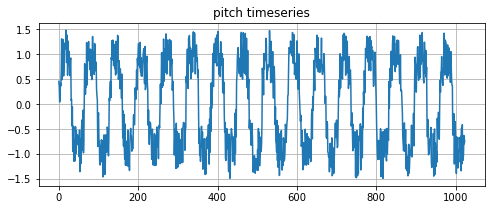

In [23]:
# plot time series and dft
y = plt.loadtxt("pitch.txt", float)

plt.figure(1, figsize=(8, 3))
plt.plot(y)
plt.title('pitch timeseries')
plt.grid()

In [24]:
# dft
dft_time = time()
c = dft(y)
dft_time = time() - dft_time

# now do it again with FFT
fft_time = time()
c2 = rfft(y)
fft_time = time() - fft_time

# compare home made dft with fft performance
print('dft time {0:10.2e} and fft time {1:10.2e}'.format(dft_time, fft_time))
print('maximum  |c2-c|: ', max(abs(c2-c)))

dft time   2.05e+00 and fft time   1.07e-04
maximum  |c2-c|:  1.233332679960023e-11


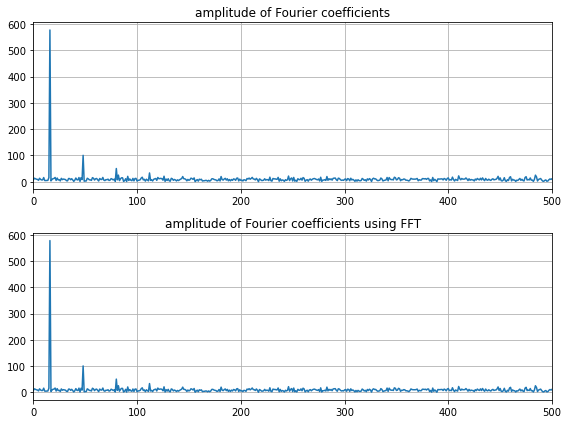

In [26]:
plt.figure(2, figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(abs(c))
plt.title('amplitude of Fourier coefficients')
plt.xlim(0, 500)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(abs(c2))
plt.title('amplitude of Fourier coefficients using FFT')
plt.xlim(0, 500)
plt.grid()
plt.tight_layout()

So, visual inspection shows that DFT and FFT give the same result, but the DFT algorithm was 20,000 times slower than the FFT algorithm (which is actually much slower than predicted but our scaling arguments of $N^2$ vs. $N\log_2N$, but our method of measurement is very crude).

Let's now define a few basic quantities.

In [27]:
# now include proper time dimensions
# sampling frequency for audio signal
f = 44100.0  # Hz
# related temporal sample
dt = 1/f  # s
# length of vector
N = len(y)
# length of interval
T = N*dt
# convert to (angular) frequency
freq = np.arange(N/2+1)*2*pi/T
# dimensional time axis
t = np.arange(N)*dt

We then seek to "de-noise" the signal.
In the `pitch.txt` data we loaded before, we will treat the top three amplitudes as our "signal", and everything else as the "noise".
The first step is therefore to sort all coefficients by amplitude and isolate the first three.

In [28]:
# sort on maximum frequency
MaxFreqs = np.argsort(abs(c2)**2)  # get indices of largest three frequencies
MaxFreqs = MaxFreqs[-1:-4:-1]  # retain only top three
print('top three frequencies and their amplitudes:')
print('{0:10.2f} {1:10.2f} {2:10.2f} Hz' .format(
    freq[MaxFreqs[0]]/(2*pi),
    freq[MaxFreqs[1]]/(2*pi),
    freq[MaxFreqs[2]]/(2*pi)))
print('{0:10.2f} {1:10.2f} {2:10.2f}'.format(
    abs(c2[MaxFreqs[0]]), abs(c2[MaxFreqs[1]]), abs(c2[MaxFreqs[2]])))

top three frequencies and their amplitudes:
    689.06    2067.19    3445.31 Hz
    577.64     100.46      50.24


Below, I will isolate the "noise" by zeroing out the top three amplitudes and inverse-tranforming.

In [29]:
# create a filtered array
c2_filt = np.copy(c2[:])
# zero out desired indices
c2_filt[MaxFreqs] = 0.0
# transform back to time domain
y_filt = irfft(c2_filt)

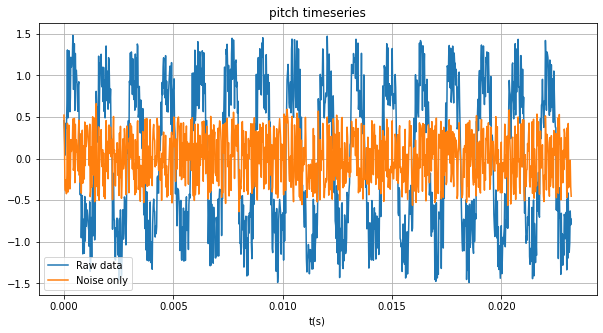

In [31]:
# plot signal and noise
plt.figure(2, figsize=(10, 5))
plt.plot(t, y, label='Raw data')
plt.plot(t, y_filt, label='Noise only')
plt.xlabel('t(s)')
plt.title('pitch timeseries')
plt.grid()
plt.legend()

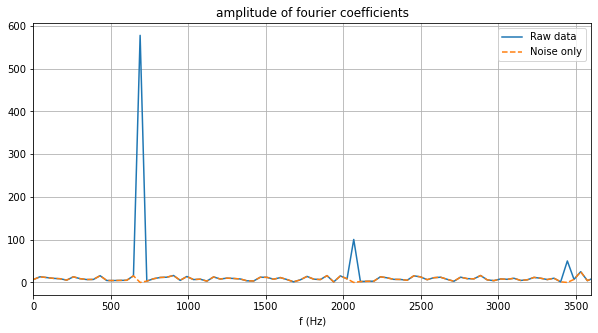

In [32]:
plt.figure(3, figsize=(10, 5))
plt.plot(freq/(2*pi), abs(c2), label='Raw data')
plt.plot(freq/(2*pi), abs(c2_filt), '--', label='Noise only')
plt.title('amplitude of fourier coefficients')
plt.xlim((0, 3600))
plt.xlabel('f (Hz)')
plt.grid()
plt.legend()

Finally, let's plot the "de-noised" data.

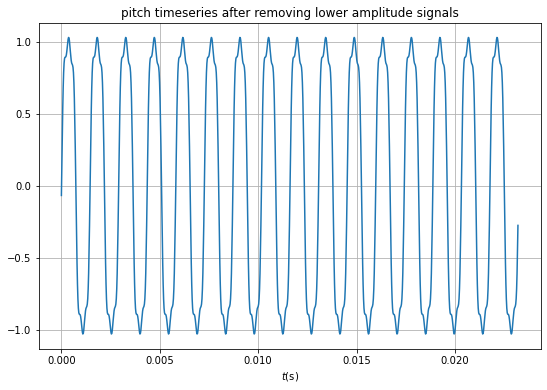

In [69]:
plt.figure(5, figsize=(9, 6))
# let's plot the cleaned up time series too
plt.plot(t, y-y_filt)
plt.xlabel('$t$(s)')
plt.title('pitch timeseries after removing lower amplitude signals')
plt.grid()

# 2D DFTs

Suppose we have a $M \times N$ sample grid, with values $y_{mn}$. To perform 2D DFT:

* Fourier transform the $M$ rows:
$$c'_{m\ell} = \sum_{n=0}^{N-1}y_{mn}\exp\left(-i\frac{2\pi \ell n}{N}\right)$$

* Fourier transform the $N$ columns:
$$c_{k\ell} = \sum_{m=0}^{M-1}c'_{m\ell}\exp\left(-i\frac{2\pi km}{M}\right) = \sum_{k=0}^{M-1}\sum_{n=0}^{N-1} y_{mn} \exp\left[-i 2\pi\left(\frac{km}{M} + \frac{\ell n}{N}\right)\right].$$

Inverse 2D DFT:
$$y_{mn} = \frac{1}{MN}\sum_{k=0}^{M-1}\sum_{\ell=0}^{N-1}c_{kl}\exp\left[i 2\pi\left(\frac{km}{N} + \frac{\ell n}{N}\right)\right].$$

# Summary

## Discrete Fourier Transforms

* Compute the integrals in the formulas for the Fourier coefficients with the trapezoidal rule
* Periodicity of the signal makes the trapezoidal rule even easier
* Trapezoidal rule: not the best integral, but to compute the inverse DFT yields **exactly** the original values!

## Fast Fourier Transforms

* End result is **exactly** the end result of DFT
* Much faster simply thanks to a clever rearrangement of order of operations: "divide-and-conquer".
* Made possible by symmetries in roots of unity $\exp(2i\pi n/N)$
* Bisections and multiplications: $O(N\log_2N)$ ops.
* Much faster than $O(N^2)$ for DFT.